<a href="https://colab.research.google.com/github/anutishah/project_chd/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
! git clone https://github.com/DS3001/project_chd


fatal: destination path 'project_chd' already exists and is not an empty directory.


In [227]:
import pandas as pd
import numpy as np
import seaborn as sns

In [228]:
df_train = pd.read_csv('/content/project_chd/fhs_train.csv')
df_test = pd.read_csv('/content/project_chd/fhs_test.csv')
print(df_train.head())
print(df_test.head())

   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1267    1   58        1.0              0         0.0     0.0   
1        1209    0   40        1.0              1        15.0     0.0   
2        2050    0   52        1.0              0         0.0     0.0   
3        1183    1   38        2.0              1        43.0     0.0   
4        3225    0   43        1.0              0         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    220.0  143.0  104.0  29.85   
1                0             0         0    199.0  122.0   82.0  22.16   
2                0             0         0    275.0  112.0   71.0  25.68   
3                0             1         0    170.0  130.0   94.0  23.90   
4                0             0         0    202.0  124.0   92.0  21.26   

   heartRate  glucose  TenYearCHD  
0         75     87.0           1  
1         85     77.0           

In [229]:
print(df_train.shape)
print(df_test.shape)

(3180, 17)
(1060, 17)


In [230]:
print(df_train.dtypes)
print(df_test.dtypes)

Unnamed: 0           int64
sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose            float64
TenYearCHD           int64
dtype: object
Unnamed: 0           int64
sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [231]:
hr = df_train['heartRate']
hr.unique()

array([ 75,  85,  80, 110,  91,  63,  70,  44, 103,  58,  74,  95,  78,
        60,  81,  68,  79, 100,  72,  93,  66,  77,  69,  76,  65,  67,
        54,  62,  90,  73, 120, 106, 115,  50,  64,  82,  98,  57,  83,
        88,  84,  86,  92,  56,  96,  94,  87, 108,  55,  71,  52, 102,
       107,  51,  61,  53,  89, 105,  59, 140, 104,  99, 125, 112, 122,
        48,  46,  97,  47, 130])

In [232]:
hr = df_test['heartRate']
hr.unique()

array([ 78.,  60.,  80.,  85.,  58.,  70.,  67.,  72.,  75.,  92.,  68.,
        73.,  82.,  84.,  88.,  63.,  79.,  83.,  90.,  62.,  65.,  52.,
        81.,  56.,  87.,  64.,  96.,  76.,  95., 102.,  71., 108.,  94.,
        74.,  66.,  77.,  86.,  69., 100.,  nan,  55.,  57.,  50.,  45.,
       110., 103., 125.,  98., 105.,  91., 143.,  89., 101., 112., 107.,
        48., 104., 122.,  59.,  61., 120.])

In [233]:
chol_train = df_train['totChol']
chol_train.unique()

array([220., 199., 275., 170., 202., 232., 237., 254., 332., 259., 229.,
       315., 257., 214., 261., 210., 309., 247., 193., 285., 179., 184.,
       207., 256., 180., 301., 240., 152., 219., 290., 311., 148., 276.,
       160., 194., 252., 230., 201., 322., 238., 288., 246., 267., 283.,
       228., 186., 159., 277., 342., 292., 213., 270., 185., 175., 233.,
       336., 171., 221., 218., 225., 263., 216., 200., 187., 340., 273.,
       241., 296., 212., 196., 192., 354., 260., 189., 258., 250., 334.,
       183., 265., 209., 195., 243., 222., 271., 289., 347., 321., 150.,
       299., 206., 167., 165., 302., 231., 266., 204., 223., 272., 198.,
       236., 235., 215., 156., 155., 300., 217., 280., 245., 262., 305.,
       306., 269., 203., 390., 325., 211., 242., 350., 314., 323., 234.,
       190., 287., 328., 268., 188., 304., 205., 294., 174., 297., 293.,
       278.,  nan, 227., 172., 329., 249., 244., 178., 154., 248., 239.,
       251., 286., 226., 346., 153., 312., 282., 25

In [234]:
chol_NA = chol_train.isnull()
print(np.sum(chol_NA),'\n') #only 39 nan values out of ~3000
chol_train = chol_train.dropna()

39 



In [235]:
chol_train.unique()

array([220., 199., 275., 170., 202., 232., 237., 254., 332., 259., 229.,
       315., 257., 214., 261., 210., 309., 247., 193., 285., 179., 184.,
       207., 256., 180., 301., 240., 152., 219., 290., 311., 148., 276.,
       160., 194., 252., 230., 201., 322., 238., 288., 246., 267., 283.,
       228., 186., 159., 277., 342., 292., 213., 270., 185., 175., 233.,
       336., 171., 221., 218., 225., 263., 216., 200., 187., 340., 273.,
       241., 296., 212., 196., 192., 354., 260., 189., 258., 250., 334.,
       183., 265., 209., 195., 243., 222., 271., 289., 347., 321., 150.,
       299., 206., 167., 165., 302., 231., 266., 204., 223., 272., 198.,
       236., 235., 215., 156., 155., 300., 217., 280., 245., 262., 305.,
       306., 269., 203., 390., 325., 211., 242., 350., 314., 323., 234.,
       190., 287., 328., 268., 188., 304., 205., 294., 174., 297., 293.,
       278., 227., 172., 329., 249., 244., 178., 154., 248., 239., 251.,
       286., 226., 346., 153., 312., 282., 253., 31

In [236]:
chol_test = df_test['totChol']
chol_test.unique()

array([ nan, 264., 271., 207., 202., 218., 236., 214., 232., 282., 203.,
       267., 318., 307., 366., 156., 174., 173., 254., 328., 215., 281.,
       175., 280., 261., 225., 189., 272., 265., 310., 250., 216., 212.,
       190., 163., 288., 220., 226., 205., 241., 210., 277., 262., 245.,
       237., 340., 149., 223., 290., 259., 240., 253., 198., 274., 339.,
       287., 233., 162., 284., 180., 248., 270., 201., 178., 169., 182.,
       285., 206., 273., 193., 311., 152., 222., 165., 230., 234., 260.,
       224., 148., 239., 256., 286., 243., 247., 177., 257., 235., 185.,
       305., 300., 258., 283., 275., 263., 167., 196., 171., 331., 238.,
       217., 255., 246., 295., 345., 219., 186., 197., 227., 334., 199.,
       191., 293., 268., 252., 195., 303., 172., 278., 231., 304., 179.,
       276., 299., 213., 453., 308., 194., 296., 292., 176., 187., 209.,
       355., 229., 368., 316., 228., 211., 294., 168., 135., 200., 244.,
       183., 269., 333., 317., 289., 204., 170., 22

In [237]:
chol_NA = chol_test.isnull()
print(np.sum(chol_NA),'\n') #only 39 nan values out of ~3000
chol_test = chol_test.dropna()

11 



In [238]:
chol_test.unique()

array([264., 271., 207., 202., 218., 236., 214., 232., 282., 203., 267.,
       318., 307., 366., 156., 174., 173., 254., 328., 215., 281., 175.,
       280., 261., 225., 189., 272., 265., 310., 250., 216., 212., 190.,
       163., 288., 220., 226., 205., 241., 210., 277., 262., 245., 237.,
       340., 149., 223., 290., 259., 240., 253., 198., 274., 339., 287.,
       233., 162., 284., 180., 248., 270., 201., 178., 169., 182., 285.,
       206., 273., 193., 311., 152., 222., 165., 230., 234., 260., 224.,
       148., 239., 256., 286., 243., 247., 177., 257., 235., 185., 305.,
       300., 258., 283., 275., 263., 167., 196., 171., 331., 238., 217.,
       255., 246., 295., 345., 219., 186., 197., 227., 334., 199., 191.,
       293., 268., 252., 195., 303., 172., 278., 231., 304., 179., 276.,
       299., 213., 453., 308., 194., 296., 292., 176., 187., 209., 355.,
       229., 368., 316., 228., 211., 294., 168., 135., 200., 244., 183.,
       269., 333., 317., 289., 204., 170., 221., 26

In [239]:
chd = df_train['TenYearCHD']
chd.unique()

array([1, 0])

In [240]:
chd = df_test['TenYearCHD']
chd.unique()

array([0, 1])

In [241]:
chol_train = chol_train.astype(int)
chol_test = chol_test.astype(int)

In [242]:
df_train.describe()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3180.000000,3180.000000,3180.000000,3095.000000,3180.000000,3156.000000,3143.000000,3180.000000,3180.000000,3180.000000,3141.000000,3180.000000,3180.000000,3165.000000,3180.000000,2895.000000,3180.000000
mean,2129.740881,0.433019,49.633962,1.957027,0.490881,8.970532,0.029590,0.006604,0.321069,0.026101,236.600764,132.784748,83.117767,25.888117,75.942138,81.833506,0.153145
std,1231.779357,0.495571,8.557596,1.011135,0.499995,12.013704,0.169479,0.081008,0.466961,0.159460,44.847411,22.433267,12.009212,4.130475,12.050504,23.625357,0.360184
min,1.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,1062.750000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.100000,68.000000,71.000000,0.000000
50%,2137.500000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,129.000000,82.000000,25.490000,75.000000,78.000000,0.000000
75%,3209.250000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.125000,90.000000,28.140000,83.000000,87.000000,0.000000
max,4240.000000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,140.000000,394.000000,1.000000


In [243]:
columns_to_drop = ['sex', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'sysBP',	'diaBP',	'BMI',	'glucose'	 ]
df_train = df_train.drop(columns=columns_to_drop)

In [244]:
df_train.describe()

,Unnamed: 0,age,totChol,heartRate,TenYearCHD
count,3180.000000,3180.000000,3141.000000,3180.000000,3180.000000
mean,2129.740881,49.633962,236.600764,75.942138,0.153145
std,1231.779357,8.557596,44.847411,12.050504,0.360184
min,1.000000,32.000000,107.000000,44.000000,0.000000
25%,1062.750000,42.000000,205.000000,68.000000,0.000000
50%,2137.500000,49.000000,233.000000,75.000000,0.000000
75%,3209.250000,56.000000,262.000000,83.000000,0.000000
max,4240.000000,70.000000,696.000000,140.000000,1.000000


In [245]:
df_test.describe()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,1060.000000,1060.000000,1060.000000,1040.000000,1060.000000,1055.000000,1044.000000,1060.000000,1060.000000,1060.000000,1049.000000,1060.000000,1060.000000,1056.000000,1059.000000,957.000000,1060.000000
mean,2092.777358,0.417925,49.418868,2.046154,0.503774,9.111848,0.029693,0.003774,0.279245,0.024528,236.995234,131.064151,82.237736,25.539100,75.689330,82.357367,0.148113
std,1201.024284,0.493450,8.620858,1.042774,0.500222,11.650215,0.169822,0.061342,0.448840,0.154755,43.835233,20.743991,11.589415,3.914418,11.953153,24.931659,0.355380
min,4.000000,0.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,92.500000,48.000000,15.960000,45.000000,44.000000,0.000000
25%,1054.500000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.000000,22.850000,68.000000,72.000000,0.000000
50%,2074.500000,0.000000,49.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,235.000000,127.000000,81.000000,25.140000,75.000000,78.000000,0.000000
75%,3093.500000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,265.000000,140.125000,88.000000,27.860000,82.000000,87.000000,0.000000
max,4235.000000,1.000000,69.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,453.000000,215.000000,140.000000,45.790000,143.000000,394.000000,1.000000


In [246]:
columns_to_drop = ['sex', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'sysBP',	'diaBP',	'BMI',	'glucose'	 ]
df_test = df_test.drop(columns=columns_to_drop)

In [247]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [248]:
df_test.describe()

,Unnamed: 0,age,totChol,heartRate,TenYearCHD
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,2092.821565,49.398855,237.012405,75.669847,0.145992
std,1204.313345,8.612605,43.852632,11.984460,0.353267
min,4.000000,34.000000,124.000000,45.000000,0.000000
25%,1048.500000,42.000000,206.000000,67.750000,0.000000
50%,2072.500000,49.000000,235.000000,75.000000,0.000000
75%,3093.500000,56.000000,265.000000,82.000000,0.000000
max,4235.000000,69.000000,453.000000,143.000000,1.000000


In [249]:
def maxmin(x):
    print(x-min(x))
    print(max(x)-min(x))
    u = (x-min(x))/(max(x)-min(x))
    return u

df_train['totChol'] = maxmin(df_train['totChol'])
df_train['heartRate'] = maxmin(df_train['heartRate'])
df_test['totChol'] = maxmin(df_test['totChol'])
df_test['heartRate'] = maxmin(df_test['heartRate'])




0       113.0
1        92.0
2       168.0
3        63.0
4        95.0
        ...  
3175    127.0
3176    177.0
3177    203.0
3178    189.0
3179    129.0
Name: totChol, Length: 3141, dtype: float64
589.0
0       31
1       41
2       36
3       66
4       31
        ..
3175    14
3176    29
3177    20
3178    26
3179    42
Name: heartRate, Length: 3141, dtype: int64
96
1       140.0
3       147.0
4        83.0
5        78.0
6        94.0
        ...  
1055     60.0
1056     71.0
1057     37.0
1058    136.0
1059    141.0
Name: totChol, Length: 1048, dtype: float64
329.0
1       15.0
3       35.0
4       33.0
5       40.0
6       13.0
        ... 
1055    41.0
1056    13.0
1057    11.0
1058    30.0
1059    45.0
Name: heartRate, Length: 1048, dtype: float64
98.0


In [250]:
df_test.head()

,Unnamed: 0,age,totChol,heartRate,TenYearCHD
1,4070,51,0.425532,0.153061,0
3,1695,40,0.446809,0.357143,1
4,2692,58,0.252280,0.336735,0
5,357,53,0.237082,0.408163,0
6,632,41,0.285714,0.132653,0


In [251]:
print(df_train['totChol'].unique())


[0.19185059 0.15619694 0.2852292  0.10696095 0.16129032 0.21222411
 0.22071307 0.24957555 0.3820034  0.25806452 0.20713073 0.35314092
 0.25466893 0.18166384 0.2614601  0.17487267 0.34295416 0.237691
 0.14601019 0.30220713 0.12224109 0.13073005 0.16977929 0.25297114
 0.12393888 0.32937182 0.22580645 0.07640068 0.1901528  0.3106961
 0.34634975 0.06960951 0.28692699 0.08998302 0.14770798 0.24617997
 0.20882852 0.15959253 0.36502547 0.22241087 0.30730051 0.23599321
 0.27164686 0.29881154 0.20543294 0.13412564 0.08828523 0.28862479
 0.39898132 0.31409168 0.17996604 0.27674024 0.13242784 0.11544992
 0.2139219  0.38879457 0.10865874 0.19354839 0.18845501 0.20033956
 0.26485569 0.18505942 0.15789474 0.13582343 0.39558574 0.28183362
 0.22750424 0.32088285 0.17826825 0.15110357 0.14431239 0.41935484
 0.25976231 0.13921902 0.25636672 0.24278438 0.38539898 0.12903226
 0.26825127 0.17317487 0.14940577 0.23089983 0.19524618 0.27843803
 0.3089983  0.40747029 0.36332767 0.07300509 0.32597623 0.1680814

In [252]:
print(df_test['totChol'].unique())

[0.42553191 0.44680851 0.25227964 0.23708207 0.28571429 0.34042553
 0.27355623 0.32826748 0.48024316 0.24012158 0.43465046 0.58966565
 0.556231   0.73556231 0.09726444 0.15197568 0.14893617 0.39513678
 0.62006079 0.27659574 0.47720365 0.1550152  0.47416413 0.41641337
 0.30699088 0.19756839 0.44984802 0.42857143 0.56534954 0.38297872
 0.27963526 0.2674772  0.2006079  0.11854103 0.49848024 0.29179331
 0.3100304  0.24620061 0.3556231  0.26139818 0.46504559 0.41945289
 0.36778116 0.34346505 0.65653495 0.07598784 0.30091185 0.50455927
 0.41033435 0.35258359 0.39209726 0.22492401 0.45592705 0.65349544
 0.49544073 0.33130699 0.11550152 0.48632219 0.17021277 0.3768997
 0.443769   0.23404255 0.16413374 0.13677812 0.17629179 0.4893617
 0.24924012 0.45288754 0.20972644 0.56838906 0.08510638 0.29787234
 0.12462006 0.32218845 0.3343465  0.41337386 0.30395137 0.07294833
 0.34954407 0.40121581 0.49240122 0.36170213 0.37386018 0.16109422
 0.40425532 0.33738602 0.18541033 0.55015198 0.53495441 0.407294

In [253]:
from sklearn.model_selection import train_test_split
y_train = df_train['TenYearCHD']
X_train = df_train.drop('TenYearCHD',axis=1)

In [254]:
from sklearn.model_selection import train_test_split
y_test = df_test['TenYearCHD']
X_test = df_test.drop('TenYearCHD',axis=1)

In [255]:
X_train['heartRate'].unique()

array([0.32291667, 0.42708333, 0.375     , 0.6875    , 0.48958333,
       0.19791667, 0.27083333, 0.        , 0.61458333, 0.14583333,
       0.3125    , 0.53125   , 0.35416667, 0.16666667, 0.38541667,
       0.25      , 0.36458333, 0.58333333, 0.29166667, 0.51041667,
       0.22916667, 0.34375   , 0.26041667, 0.33333333, 0.21875   ,
       0.23958333, 0.10416667, 0.1875    , 0.47916667, 0.30208333,
       0.79166667, 0.64583333, 0.73958333, 0.0625    , 0.20833333,
       0.39583333, 0.5625    , 0.13541667, 0.40625   , 0.45833333,
       0.41666667, 0.4375    , 0.5       , 0.125     , 0.54166667,
       0.52083333, 0.44791667, 0.66666667, 0.11458333, 0.28125   ,
       0.08333333, 0.60416667, 0.65625   , 0.07291667, 0.17708333,
       0.09375   , 0.46875   , 0.63541667, 0.15625   , 1.        ,
       0.625     , 0.57291667, 0.84375   , 0.70833333, 0.8125    ,
       0.04166667, 0.02083333, 0.55208333, 0.03125   , 0.89583333])

In [256]:
X_train['totChol'].unique()

array([0.19185059, 0.15619694, 0.2852292 , 0.10696095, 0.16129032,
       0.21222411, 0.22071307, 0.24957555, 0.3820034 , 0.25806452,
       0.20713073, 0.35314092, 0.25466893, 0.18166384, 0.2614601 ,
       0.17487267, 0.34295416, 0.237691  , 0.14601019, 0.30220713,
       0.12224109, 0.13073005, 0.16977929, 0.25297114, 0.12393888,
       0.32937182, 0.22580645, 0.07640068, 0.1901528 , 0.3106961 ,
       0.34634975, 0.06960951, 0.28692699, 0.08998302, 0.14770798,
       0.24617997, 0.20882852, 0.15959253, 0.36502547, 0.22241087,
       0.30730051, 0.23599321, 0.27164686, 0.29881154, 0.20543294,
       0.13412564, 0.08828523, 0.28862479, 0.39898132, 0.31409168,
       0.17996604, 0.27674024, 0.13242784, 0.11544992, 0.2139219 ,
       0.38879457, 0.10865874, 0.19354839, 0.18845501, 0.20033956,
       0.26485569, 0.18505942, 0.15789474, 0.13582343, 0.39558574,
       0.28183362, 0.22750424, 0.32088285, 0.17826825, 0.15110357,
       0.14431239, 0.41935484, 0.25976231, 0.13921902, 0.25636

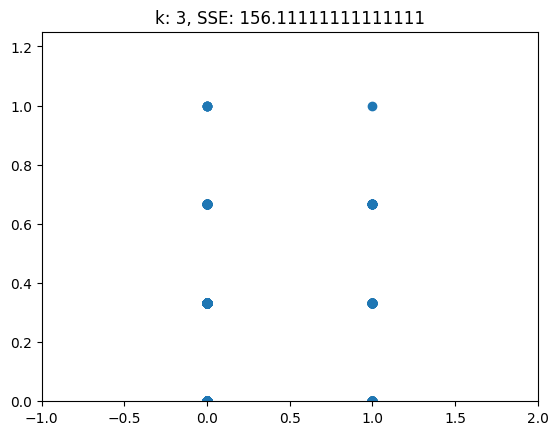

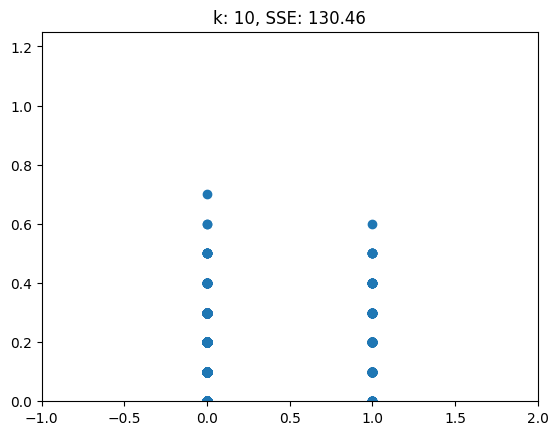

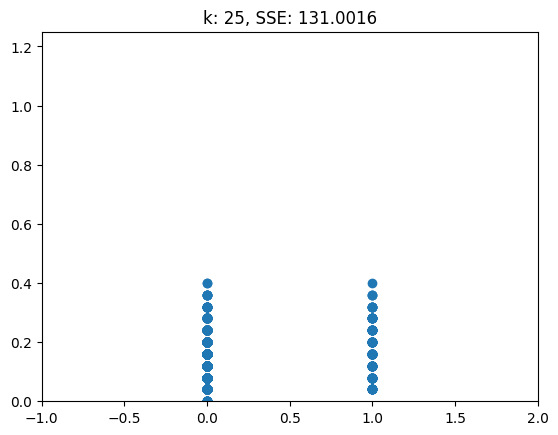

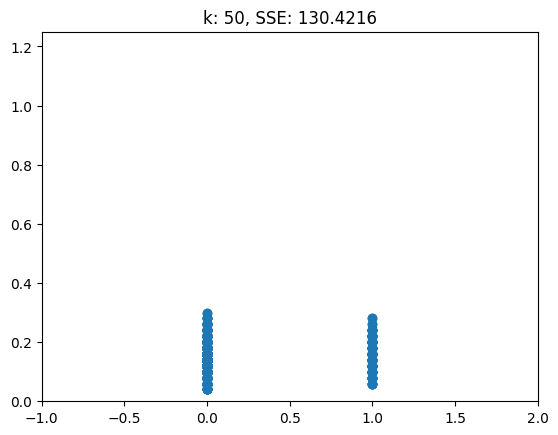

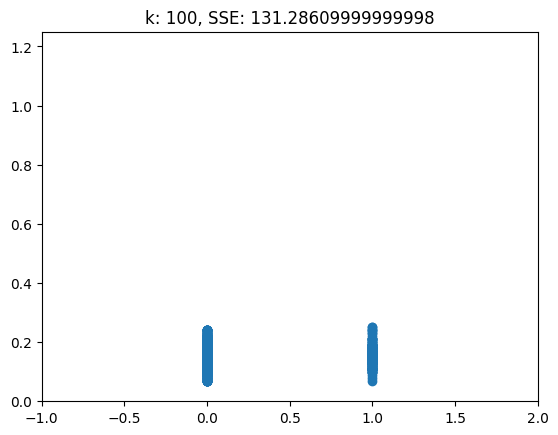

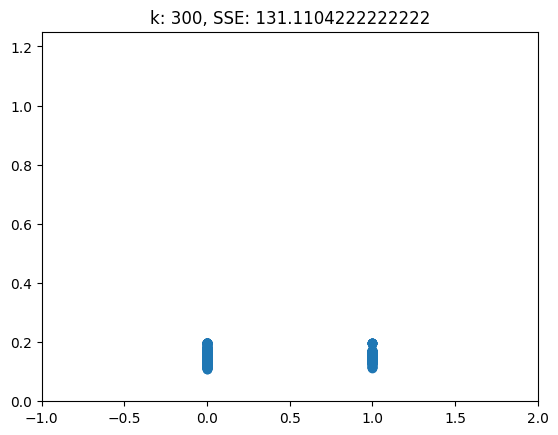

In [257]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

for k in [3,10,25,50,100,300]:

    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)

    SSE = np.sum( (y_test-y_hat)**2 )
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(0,1.25)
    axes.set_xlim(-1, 2)
    plt.show()


In [258]:
combined_df = pd.concat([df_train, df_test], ignore_index=True)
combined_df.head()

,Unnamed: 0,age,totChol,heartRate,TenYearCHD
0,1267,58,0.191851,0.322917,1
1,1209,40,0.156197,0.427083,0
2,2050,52,0.285229,0.375000,0
3,1183,38,0.106961,0.687500,0
4,3225,43,0.161290,0.322917,0


In [259]:
combined_df.describe()

,Unnamed: 0,age,totChol,heartRate,TenYearCHD
count,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000
mean,2121.695870,49.554070,0.250924,0.327539,0.151349
std,1224.991273,8.560881,0.107929,0.125042,0.358431
min,1.000000,32.000000,0.000000,0.000000,0.000000
25%,1061.000000,42.000000,0.178268,0.239583,0.000000
50%,2123.000000,49.000000,0.231003,0.322917,0.000000
75%,3184.000000,56.000000,0.300912,0.395833,0.000000
max,4240.000000,70.000000,1.000000,1.000000,1.000000


<Axes: xlabel='TenYearCHD', ylabel='Density'>

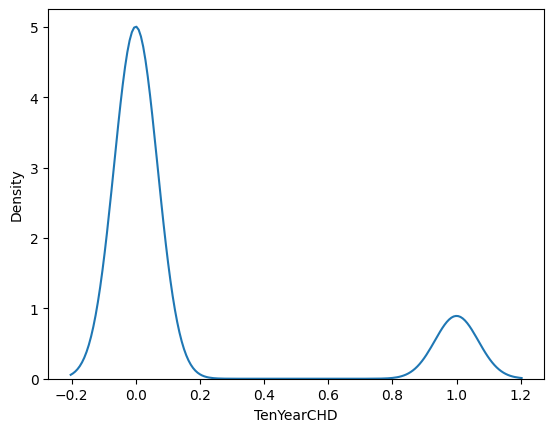

In [260]:
sns.kdeplot(data=combined_df,x='TenYearCHD')

In [261]:
combined_df['HasCHD'] = combined_df['TenYearCHD'].replace([1])
df['class'] = df['class'].replace(['MIDSIZE CARS','COMPACT CARS','SUBCOMPACT CARS','TWO SEATERS','LARGE CARS'],'car')
df['class'] = df['class'].replace(['SMALL STATION WAGONS','MIDSIZE STATION WAGONS'],'station wagon')
df['class'] = df['class'].replace(['STANDARD PICKUP TRUCKS','SMALL PICKUP TRUCKS'],'truck')
df['class'] = df['class'].replace(['VANS','MINIVAN'],'van')
combined_df.loc[:, ['heartRate', 'TenYearCHD']].groupby('TenYearCHD').describe()



heartRate                                                   \
               count      mean       std      min       25%       50%   
TenYearCHD                                                              
0             3555.0  0.326233  0.124562  0.00000  0.239583  0.322917   
1              634.0  0.334867  0.127549  0.05102  0.246173  0.322917   

                                
                 75%       max  
TenYearCHD                      
0           0.395833  1.000000  
1           0.408163  0.791667

In [262]:
combined_df.loc[:, ['totChol', 'TenYearCHD']].groupby('TenYearCHD').describe()

totChol                                                    \
             count      mean       std       min       25%       50%   
TenYearCHD                                                             
0           3555.0  0.248295  0.107485  0.010187  0.174873  0.229202   
1            634.0  0.265665  0.109308  0.000000  0.190153  0.250424   

                                
                 75%       max  
TenYearCHD                      
0           0.297114  1.000000  
1           0.317143  0.837012

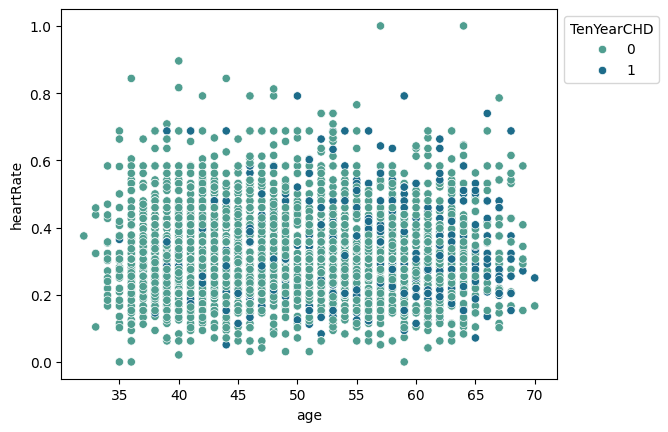

In [265]:

this_plot = sns.scatterplot(data=combined_df,x='age',y='heartRate',
                            hue='TenYearCHD',
                           palette = 'crest')
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

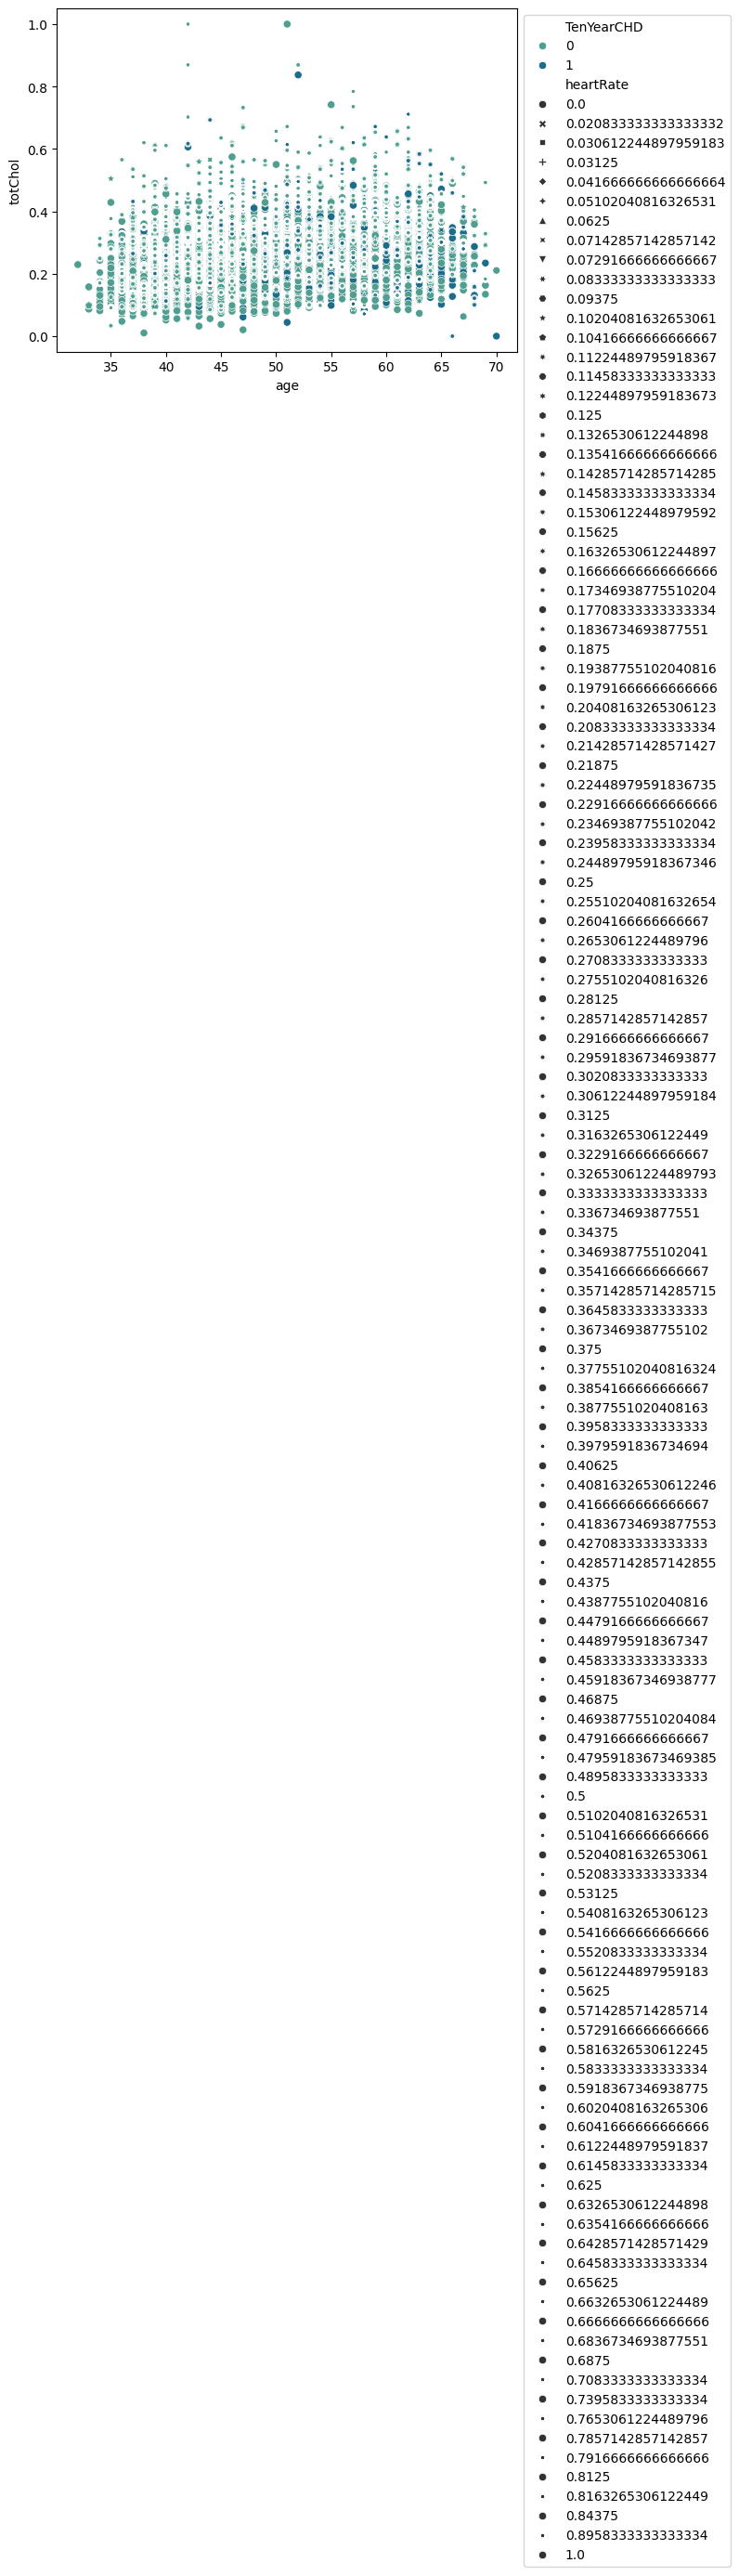

In [268]:

this_plot = sns.scatterplot(data=combined_df,x='age',y='totChol',
                            hue='TenYearCHD', style = 'heartRate',
                           palette = 'crest')
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

[21]


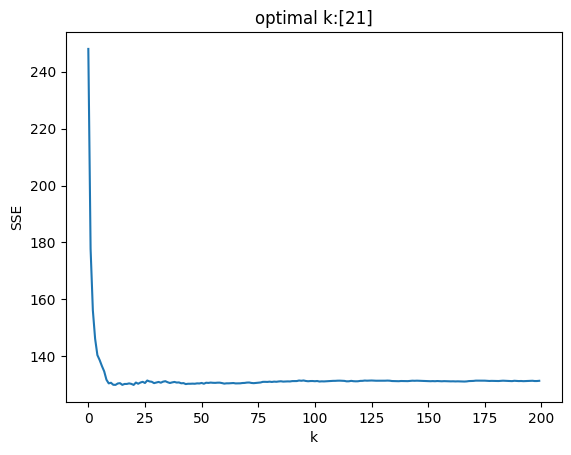

In [264]:
# Determine the optimal k:
k_bar = 200
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot SSE by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('SSE')
plt.show()